## Download and prepare the dataset

Set up the posits as default

In [6]:
import tensorflow.python.keras as k
k.backend.floatx()

'float32'

In [7]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="float32")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:20000].reshape((20000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:20000])
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [8]:
train_images.shape

(20000, 28, 28, 1)

## Download and prepare the dataset

In [9]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh", kernel_initializer=random_normal_init))
# model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh"))
# model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))


Let's display the architecture of our convnet so far:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)               

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [11]:
optimizer = k.optimizers.adam_v2.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
model.get_weights()

[array([[[[ 0.61438566,  1.6643869 ,  1.531084  , -0.7847159 ,
            0.1422056 ,  1.059027  ,  1.0183814 ,  1.0956693 ,
            1.8880298 , -0.14150478,  0.86176974, -0.95357174,
            0.04312684, -2.973703  , -1.390838  , -0.46763012,
            1.1750572 , -0.5730561 ,  2.0659194 ,  0.6932742 ,
            1.0487145 , -1.2422369 , -0.03204159,  0.8530166 ,
           -1.9881263 ,  0.44181284,  0.56425685,  0.7236283 ,
           -0.06615861, -0.62100035, -1.0992672 , -0.53964144]],
 
         [[-1.3503925 , -0.06125465, -0.7914623 ,  0.63634664,
            0.60578805, -0.17416322, -1.4419116 ,  1.2445011 ,
           -1.9725437 ,  1.3893173 ,  1.3006134 , -1.5838387 ,
            0.84553397,  1.2275556 , -0.48272276,  0.7446737 ,
            0.93057424, -0.34484947, -0.48226747, -1.5366118 ,
            0.39155257,  1.7714351 ,  1.3847545 , -0.31942707,
           -0.61713773,  0.48246905, -1.559944  , -0.6033243 ,
            0.24589433,  0.11941359, -0.8292338 ,  

In [13]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

history = model.fit(train_images, train_labels, epochs=50, batch_size=125, validation_split=0.1, callbacks=[earlystop_callback])

2023-06-22 22:35:26.419426: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
144/144 [==============================] - 5s 31ms/step - loss: 552.6107 - accuracy: 0.2177 - val_loss: 183.7193 - val_accuracy: 0.3950
Epoch 2/50
144/144 [==============================] - 4s 28ms/step - loss: 133.2770 - accuracy: 0.4833 - val_loss: 96.8977 - val_accuracy: 0.5765
Epoch 3/50
144/144 [==============================] - 4s 25ms/step - loss: 83.5382 - accuracy: 0.6102 - val_loss: 66.0266 - val_accuracy: 0.6645
Epoch 4/50
144/144 [==============================] - 4s 25ms/step - loss: 61.2704 - accuracy: 0.6801 - val_loss: 51.2333 - val_accuracy: 0.7205
Epoch 5/50
144/144 [==============================] - 4s 25ms/step - loss: 48.7526 - accuracy: 0.7240 - val_loss: 40.8561 - val_accuracy: 0.7575
Epoch 6/50
144/144 [==============================] - 4s 26ms/step - loss: 40.1303 - accuracy: 0.7569 - val_loss: 35.6153 - val_accuracy: 0.7730
Epoch 7/50
144/144 [==============================] - 4s 26ms/step - loss: 33.7828 - accuracy: 0.7830 - val_loss: 30.2412 - val

In [14]:
model.get_weights()

[array([[[[ 0.70758545,  1.4026811 ,  1.4354956 , -0.99166167,
           -0.11745088,  0.9504449 ,  0.91943556,  0.76681465,
            1.6091614 , -0.17789604,  0.8829402 , -0.7284342 ,
           -0.10261941, -2.6663616 , -1.050542  , -0.3504725 ,
            0.9997384 , -0.64988196,  1.8764013 ,  0.69473135,
            0.85531497, -1.2474687 , -0.00982195,  0.85639113,
           -1.5663209 ,  0.36174276,  0.30729264,  0.58287644,
           -0.08505058, -0.46592313, -1.0992672 , -0.29305914]],
 
         [[-1.422926  , -0.23191379, -0.604059  ,  0.5682593 ,
            0.29370278, -0.29171425, -1.4440702 ,  0.88853896,
           -1.8283172 ,  1.2244148 ,  0.94604075, -1.4247155 ,
            0.86029154,  0.99846566, -0.32243788,  0.6289051 ,
            0.78914165, -0.40303975, -0.4799584 , -1.6001939 ,
            0.28822425,  1.5392022 ,  1.3393923 , -0.47290385,
           -0.60610354,  0.64749503, -1.4059718 , -0.92508227,
            0.0923893 ,  0.07488953, -0.8292338 ,  

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

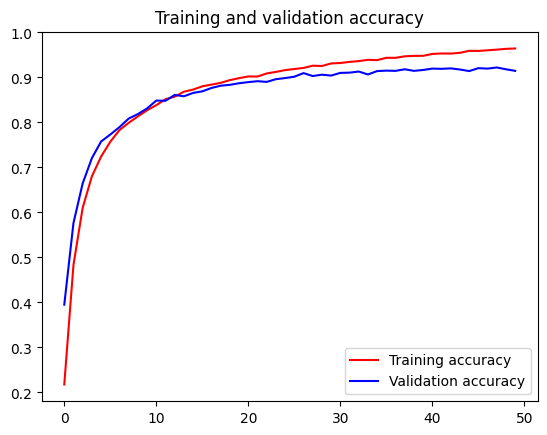

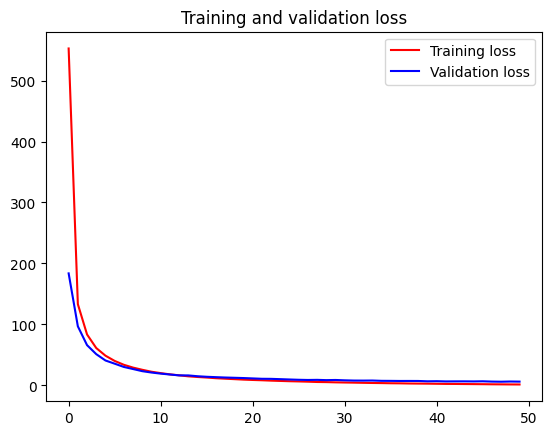

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 7.6489 - accuracy: 0.9116


In [17]:
test_acc

0.9115999937057495

In [18]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4251195e-30,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [19]:
print(random_normal_init((10,)))


tf.Tensor(
[-0.25138396  1.7331516  -0.34837875 -0.49174917 -1.0303775   0.65026253
 -1.1111982  -1.276356   -0.8411003  -2.0826323 ], shape=(10,), dtype=float32)


In [20]:
initializer = k.initializers.GlorotUniform()
values = initializer(shape=(10,), dtype="posit160")
print(values)

tf.Tensor(
[-0.546143 -0.544922 -0.545654 -0.539062 -0.545166 -0.541016 -0.544434
 -0.542236 -0.54248 -0.544678], shape=(10,), dtype=posit160)
